### Logistic regression (binary classification) - secvential algorithm

In [1]:
import numpy as np
import math
import pandas as pd
from show import show

In [2]:
data = pd.read_csv('test.csv', header=None)
data = np.array(data)
print(data)

X = np.array(data[:,[0,1]])
y = np.array(data[:,[2]]).T[0]

print("X",X)
print("y",y)

[[0.28488 0.52142 1.     ]
 [0.27633 0.21264 1.     ]
 [0.39748 0.31902 1.     ]
 [0.5533  1.      0.     ]
 [0.44274 0.59205 0.     ]
 [0.85176 0.6612  0.     ]
 [0.60436 0.86605 0.     ]]
X [[0.28488 0.52142]
 [0.27633 0.21264]
 [0.39748 0.31902]
 [0.5533  1.     ]
 [0.44274 0.59205]
 [0.85176 0.6612 ]
 [0.60436 0.86605]]
y [1. 1. 1. 0. 0. 0. 0.]


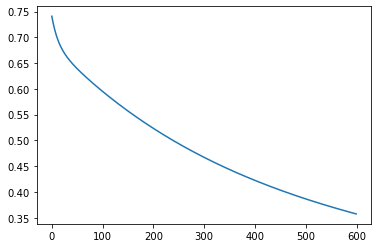

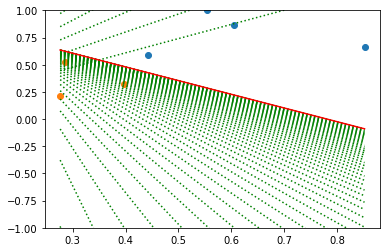

In [3]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

w1 = -1
w2 = 1
b = 0
alpha = 0.1
epochs = 600

wHistory = []
lossHistory = []

def train():
    
    global w1, w2, b
    
    dw1 = 0
    dw2 = 0
    db = 0
    loss = 0

    i = -1
    for x in X:
        i += 1
        
        x1 = x[0]
        x2 = x[1]
        
        z = w1*x1 + w2*x2 + b        
        
        y_hat = sigmoid(z)
        
        #value accumulators: below, use the mean of total
        #total loss points
        loss += (-1)*(y[i]*math.log(y_hat) +(1-y[i])*math.log(1-y_hat))
        
        #total gradients for all points, explicit compute formula
        dw1 += (y_hat - y[i]) * x1
        dw2 += (y_hat - y[i]) * x2
        db  += (y_hat - y[i])
    
    #adjust weights: using the mean of above the totalization weights
    w1 = w1 - alpha * dw1/(i+1)
    w2 = w2 - alpha * dw2/(i+1)    
    b = b - alpha *  db/(i+1)        
        
    wHistory.append([w1,w2,b])
    lossHistory.append(loss/(i+1))
        
for e in range(epochs):
    train()    
    
show(data, epochs, wHistory, lossHistory,[-1,1])    

In [4]:
len(lossHistory)

600

In [5]:
lossHistory[600-1]

0.3573265861631942

In [6]:
lossHistory[0]

0.7410356303345168